In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
from sklearn.linear_model import Ridge

# Polynomial Curve Fitting, Regularization

## Polynomial approximation of smooth curves

Use the polynomial of degree $d$

$$
\mathcal{P}_{\vec{w}}(x) = \sum_{k=0}^{k=d} w_k \cdot x^k, \; \vec{w} = [w_0, w_1, ... , w_d]^T
$$

to approximate the function $f(x) = 0.5 + 0.4 sin(2 \pi x), \; x \in [0,1]$ by finding $\vec{w} = \vec{w}^\star$ that minimizes the objective function

$$
\mathcal{MSE}(\vec{w} | \vec{x}, \vec{y}) = \frac{1}{n} \sum_{i=1}^{i=n} [y_i - \mathcal{P}_{\vec{w}}(x_i)]^2
$$

where $\{(x_i, y_i)\}_{i=1}^{i=n}$ are $n$ random observations from the curve $y = f(x)$.

In [2]:
f = lambda x : 0.5 + 0.4 * np.sin(2*np.pi*x)

def compute_MSE(v1, v2):
    v1 = np.array(v1)
    v2 = np.array(v2)
    return np.mean((v1 - v2)**2)

def generate(n, left_bound=0, right_bound=1, mu=0, sig=0.05):    # generate n samples 
    x = np.sort(np.random.uniform(low=left_bound, high=right_bound, size=n))
    y = f(x) + np.random.normal(loc=mu, scale=sig, size=n)
    return (x,y)

Generate a training set and a test set of size $n$ with Gaussian noise $N(0,0.05)$. Fit a polynomial of degree $d$ to the training set and visualize how well the fitted curve agrees with the training set, the test set, and the true curve $y=f(x)$ as $d$ increases from $0$ to $9$. In the meantime, record $\mathcal{MSE}(\vec{w}^\star | \vec{x}, \vec{y})$ for both the training set and the test set. Repeat this procedure for $n = 9, 15, 100$.

d:\python\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


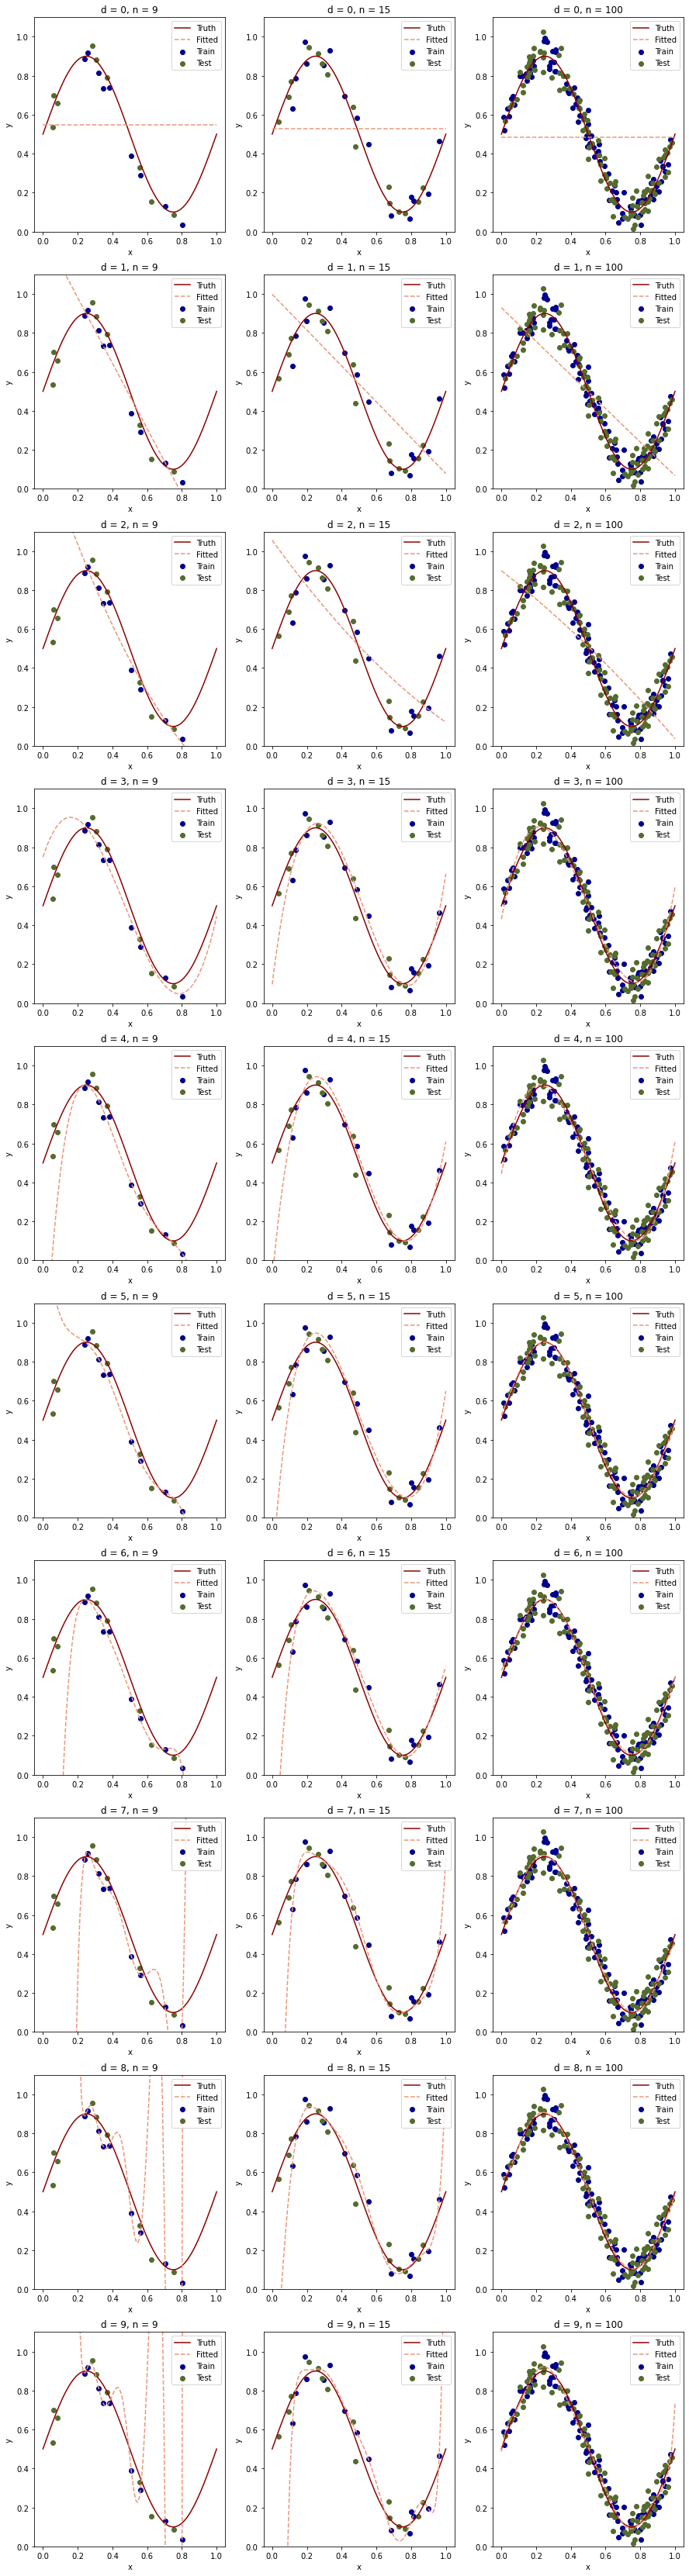

In [3]:
Size = [9, 15, 100]
x_curve = np.linspace(0,1,100)
Mse = dict()

fig,axs = plt.subplots(10,3, figsize=(15,60))  # a matrix of subplots

for j,n in enumerate(Size):
    x_train,y_train = generate(n)  # generate training set
    x_test, y_test  = generate(n)  # generate test set
    Mse[n] = list()
    for d in range(9+1):
        # fit a polynomial of degree d
        coef = np.polyfit(x_train, y_train, d)  # coefficients that minimizes the objective function
        y_fit = np.polyval(coef, x_curve)
        # plot curves
        axs[d,j].scatter(x_train, y_train, color="darkblue", label="Train") # training set
        axs[d,j].scatter(x_test, y_test, color="darkolivegreen", label="Test")  # test set
        axs[d,j].plot(x_curve, f(x_curve), color="darkred", label="Truth") # truth
        axs[d,j].plot(x_curve, y_fit, color="darksalmon", linestyle="dashed", label="Fitted") # fitted curve
        axs[d,j].set_title("d = "+str(d)+", n = "+str(n))
        axs[d,j].set_xlabel("x")
        axs[d,j].set_ylabel("y")
        axs[d,j].set_ylim(0, 1.1)
        axs[d,j].legend(loc="upper right")
        # compute MSE
        grizzly,panda = compute_MSE(np.polyval(coef,x_train), y_train), compute_MSE(np.polyval(coef,x_test), y_test)
        Mse[n].append( (grizzly,panda) )

plt.show()    

For every sample size $n$, the higher the degree, the better the polynomial "fits" each data point in the training set, but the best fit for the training set does not necessarily approximate the true curve $y = f(x)$ properly, let alone generalizing to the test set.


When $n=9$ and $n=15$, a polynomial of degree $d=3$ best describes the true curve. When $n=100$, the performance is good and only varies insignificantly for any $d \geq 5$. The curve fitting turns out to be much more **robust** to the choice of $d$ when $n=100$ than when $n=9$ and $n=15$. The main reason is that larger sample size allows the randomness in the instances to be averaged out, and as a whole, the sample itself better describes the true curve. As a result, a polynomial trained from a larger sample fits $y=f(x)$ to a greater extent.

If $d$ is small, the complexity and flexibility of a polynomial improve in general as $d$ increases, and $\mathcal{P}_{\vec{w}}(\cdot)$ becomes more capable of delineating an arbitrary shape. If $d$ is large, on the other hand, such power of curve fitting becomes so overwhelming that $\mathcal{P}_{\vec{w}}(\cdot)$ starts to capture every single instance rather than what they reflect in common, and therefore the shape of $\mathcal{P}_{\vec{w}}(\cdot)$ is dominantly influenced by the randomness in the training set; in this case, higher degree results in **overfitting**. In particular, mathematically speaking, there is always a polynomial of degree $d$, if $d \geq n$, that goes through every single one of the data points $\{(x_i, y_i)\}_{i=1}^{i=n}$ regardless of the true curve, because the linear system with respect to $\{w_k\}_{k=0}^{k=d}$, $\{\mathcal{P}_{\vec{w}}(x_i) - y_i = 0\}_{i=1}^{i=n}$, must has solutions. This is illustrated for $d=9$ and $n=9$.


## Overfitting

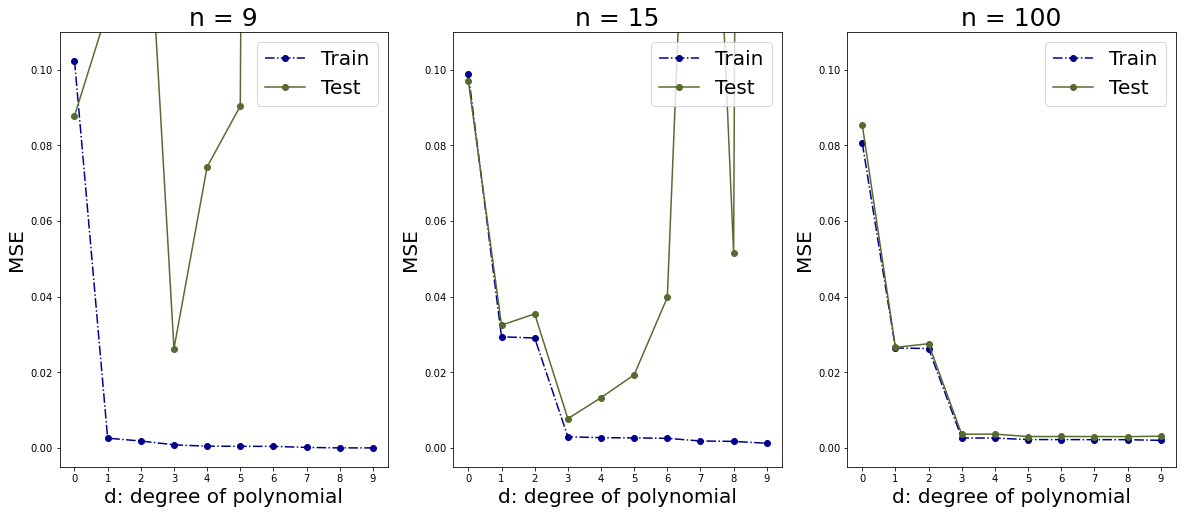

In [4]:
# plot MSE agianst d for every n

fg,ax = plt.subplots(1,3, figsize=(20,8))

for j,n in enumerate(Size):
    ax[j].plot([d for d in range(9+1)], [grizzly for grizzly,panda in Mse[n]], marker="o",
               color="darkblue", linestyle="-.", label="Train")
    ax[j].plot([d for d in range(9+1)], [panda for grizzly,panda in Mse[n]], marker="o",
               color="darkolivegreen", label="Test")
    ax[j].set_title("n = "+str(n), fontsize=25)
    ax[j].set_xlabel("d: degree of polynomial", fontsize=20)
    ax[j].set_ylabel("MSE", fontsize=20)
    ax[j].set_xticks(np.arange(0,9.1,step=1))
    ax[j].set_ylim(-0.005, 0.11)
    ax[j].legend(loc="upper right", fontsize=20)

plt.show()

Plot the Mean Squared Error $\mathcal{MSE}(\vec{w}^\star | \cdot)$, a numerical evaluation of fitness, against the degree of polynomial for both the training set and the test set. The former is minimized by the optimal choice of $\vec{w}$ during curve fitting, and thus is usually located below the latter. The closer the latter to the former, the more **generalizable** the fitting. Apparently, the fitted polynomial generalizes well to the test set when $n=100$. When $n=9$ and $n=15$, though, the fitted polynomial may deviate from the test set peculiarly if $d$ is large.

## Regularization

In order to alleviate overfitting, penalize large coefficients of the polynomial by adding a regularization term in the objective function to be minimized.

$$
\mathcal{G}(\vec{w} | \lambda, \vec{x}, \vec{y}) = \frac{1}{n} \sum_{i=1}^{i=n} [y_i - \mathcal{P}_{\vec{w}}(x_i)]^2 + \lambda \cdot \vec{w}^T\vec{w}, \; \lambda \geq 0
$$

In [5]:
def Obj(w, x, y, lam):
    v = y - np.polyval(w,x)
    return lam * np.dot(w,w) + np.dot(v,v)/len(v)

def grad(w, x, y, lam):
    v = y - np.polyval(w,x)
    return np.array([2*lam*w[k] - 2*np.dot(v,x**k)/len(v) for k in range(len(w))])

# optimize objective funtion with regularization term
def opt(Obj, x, y, d, lam, lr=0.01, eps = 10**(-5)):
    w = np.random.normal(loc=0, scale=1, size=d+1)    # random initialization
    old = 0
    new = Obj(w, x, y, lam)
    while abs(old-new)>=eps:
        old = new
        w -= lr * grad(w, x, y, lam)   # update weights
        new = Obj(w, x, y, lam)
    return {"weights":w, "fun_val":new}

In [6]:
d = 9
n = 9
lam = 0.15
np.random.seed(68)
x,y = generate(n)

# minimize objective function by gradient descent
GD = opt(Obj, x, y, d, lam)
coef_GD = GD["weights"]
print("Coeffients: ", coef_GD)
print("Function Value: ", GD["fun_val"])

Coeffients:  [ 2.72199507  0.20947957 -0.54257307  0.40870208 -0.1447198   0.78929975
 -0.05401936 -0.16849279  0.83892481 -0.50081433]
Function Value:  2.2516554449214654


One can always implement **Gradient Descent** to optimize an objective function. The gradient of $\mathcal{G}(\vec{w} | \cdot)$ at $\vec{w}$ is $\nabla |_{\vec{w}} = [\frac{\partial \: \mathcal{G}}{\partial w_0}, ... , \frac{\partial \: \mathcal{G}}{\partial w_d}]^T$, where $k = 0, ... , d$ and

$$
\begin{aligned}
\frac{\partial \: \mathcal{G}}{\partial w_k} 
&= \frac{1}{n} \sum_{i=1}^{i=n} [2(y_i - \mathcal{P}_{\vec{w}}(x_i)) \cdot \frac{- \partial \mathcal{P}_{\vec{w}}(x_i)}{\partial w_k}] + \lambda \cdot 2w_k
\\
&= 2\lambda w_k - \frac{2}{n} \sum_{i=1}^{i=n} [(y_i - \mathcal{P}_{\vec{w}}(x_i)) \cdot x_i^k]
\end{aligned}
$$

Unfortunately, this approach is often slow and unreliable. It may converge to a local minimum, or diverge without fine-tuned learning rate. Computation becomes especially expensive when $d$ is large, that is, when regularization is most needed. Indeed, the built-in algorithm for **Ridge Regression** (equivalent problem) executes the optimization more efficiently when $d=9$, $n=9$, and $\lambda = 0.15$.

In [23]:
# minimize objective function by ridge regression

def rdg(x, y, d, lam, fun_val=False):
    X = np.array([x**k for k in range(d+1)]).transpose()  # X = [1,x,x^2, ... ,x^d]
    model = Ridge(lam)
    weights = model.fit(X, y).coef_
    if fun_val: 
        return {"weights":weights, "fun_val":Obj(weights, x, y, lam)}
    else:
        return weights

RG = rdg(x,y,d,lam, fun_val=True)
coef_ridge = RG["weights"]
print("Coefficients:", coef_ridge)
print("Function Value:", RG["fun_val"])

Coefficients: [ 0.         -0.38104773 -0.40931501 -0.26319105 -0.13196151 -0.04614954
  0.0029016   0.02793432  0.03861113  0.04120783]
Function Value: 0.4116009475690495


d:\python\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


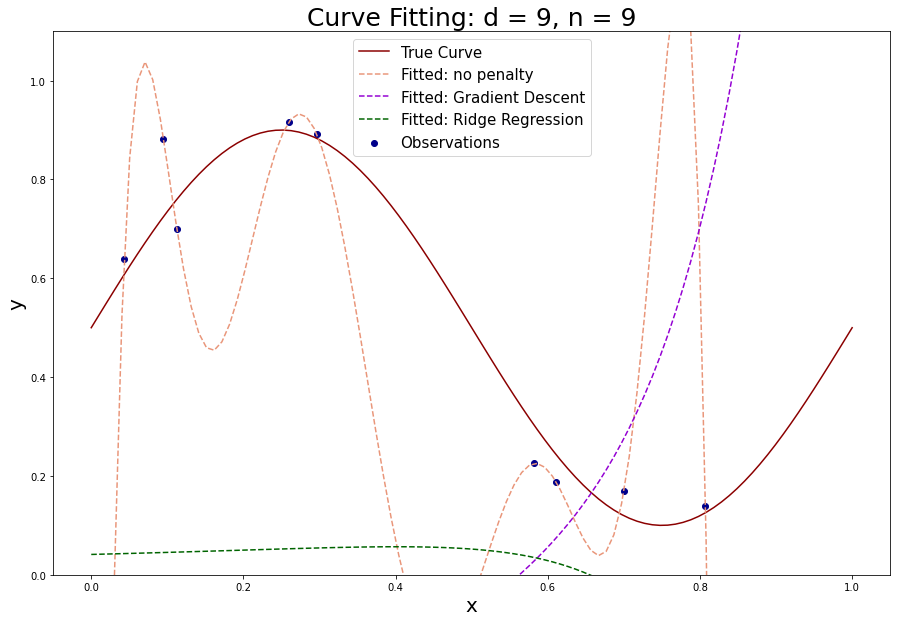

In [8]:
# visualize the impact of regularization
plt.figure(figsize=(15,10))

plt.scatter(x,y, color="darkblue", label="Observations")
plt.plot(x_curve, f(x_curve), color="darkred", label="True Curve")
plt.plot(x_curve, np.polyval(np.polyfit(x,y,d),x_curve), color="darksalmon", linestyle="dashed", label="Fitted: no penalty")
plt.plot(x_curve, np.polyval(coef_GD,x_curve), color="darkviolet", linestyle="dashed", label="Fitted: Gradient Descent")
plt.plot(x_curve, np.polyval(coef_ridge,x_curve), color="darkgreen", linestyle="dashed", label="Fitted: Ridge Regression")
plt.title("Curve Fitting: d = "+str(d)+", n = "+str(n), fontsize=25)
plt.xlabel("x", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.ylim(0,1.1)
plt.legend(loc="upper center", fontsize=15)

plt.show()

Either way, regularization prevents the fitted polynomial from frequent, sudden veer that aims at every single instance of observation, although the performance is still remarkably inferior to a polynomial of lower degree.

## Choice of $\lambda$

Fit a polynomial of degree $d=9$ to the training set with regularization. Investigate how the strength of penalty added to the loss function affects the mean squared error for both the training set and the test set by tweaking $\lambda \in [0,2]$. For every $n$, $MSE$s drop drastically as $\lambda$ goes from zero to somewhere between $0$ and $0.1$, implying enormous enhancement of fitting performance, and then behave differently afterwards.

d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


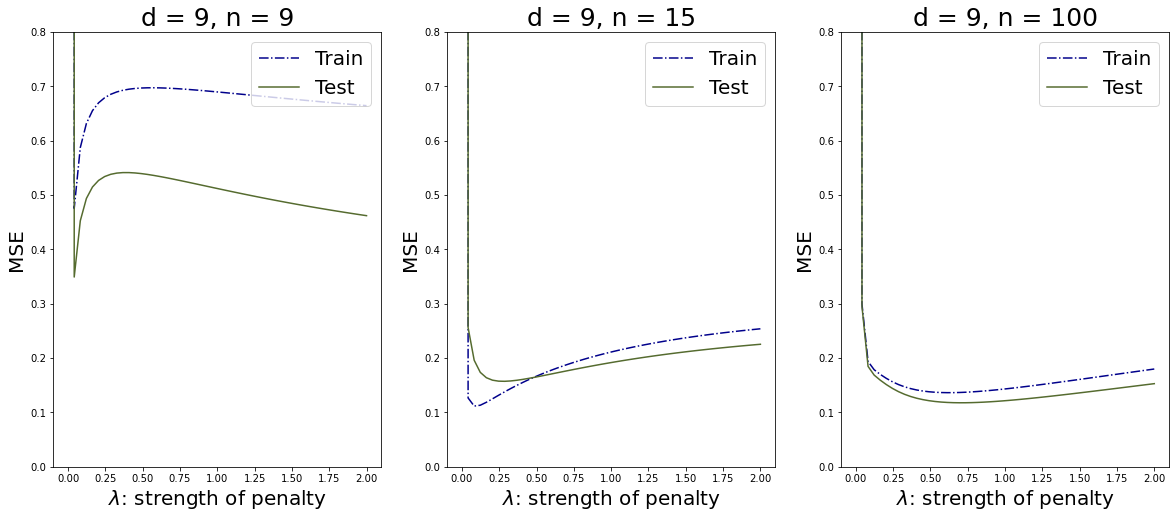

In [14]:
# plot MSE against lambda for every n

d = 9
Penalty = np.linspace(0, 2, 50)

pic,az = plt.subplots(1,3, figsize=(20,8))
for j,n in enumerate(Size):
    x_train, y_train = generate(n)
    x_test, y_test = generate(n)
    MSE_train = [compute_MSE(np.polyval(rdg(x_train,y_train,d,lam),x_train), y_train) for lam in Penalty]
    MSE_test  = [compute_MSE(np.polyval(rdg(x_train,y_train,d,lam), x_test),  y_test) for lam in Penalty]
    az[j].plot(Penalty, MSE_train, color="darkblue", linestyle="-.", label="Train")
    az[j].plot(Penalty, MSE_test, color="darkolivegreen", label="Test")
    az[j].set_ylim(0, 0.8)
    az[j].set_xlabel(r"$\lambda$: strength of penalty", fontsize=20)
    az[j].set_ylabel("MSE", fontsize=20)
    az[j].set_title("d = "+str(d)+", n = "+str(n), fontsize=25)
    az[j].legend(loc="upper right", fontsize=20)
    
plt.show()

When $n=9$, overfitting is so overwhelming that very powerful regularization is required. Both $MSE$s bounce up a bit and then steadily decline as $\lambda$ increases. So the optimal choice of $\lambda$ could exceed $2$ or may not exist. When $n=15$ and $n=100$, both $MSE$s arrive a local minimum at $\lambda = \lambda^\star$ and do not stop going up before $\lambda$ reaches $2$. Therefore $\lambda^\star$ is very likely to be the optimal strength of penalty.

Interestingly, $MSE$ for the test set is smaller than that for the training set over a significant range of $\lambda$, for every $n$, which is more than randomness can explain.

# High Dimensional Space

## n-dimensional Unit Cube

Let the number of the vertices of a n-dimensional unit cube be $\mathbf{C}(n)$. When the dimension goes from $n$ to $n+1$, the old cube generates a copy of its vertices and shifts them one unit in the new dimension so as to construct a new cube. Starting from the obvious observation $\mathbf{C}(1)=2$, $\mathbf{C}(n)$ can be computed iteratively by

$$
\mathbf{C}(n+1) = 2 \cdot \mathbf{C}(n)
$$

for every $n \in \mathbb{Z}^+$. Similarly, the longest diagonal of the old cube and the unit vector in the new dimension determine a right triangle whose hypotenuse is the longest diagonal of the new cube, when the dimension increases from $n$ to $n+1$. By Pythagorean Theorem,

$$
\mathbf{L}^2(n+1) = 1^2 + \mathbf{L}^2(n) \; \Rightarrow \; \mathbf{L}(n+1) = \sqrt{1 + \mathbf{L}^2(n)};
\;
n \in \mathbb{Z}^+
$$

In [15]:
def Corners(n):   # count the vertices for n-dimensional unit cube
    num = 1
    for dim in range(1,n+1):
        num = 2*num
    return num

In [16]:
def DiagU(n):  # calculate the longest diagonal of n-dimensional unit cube
    L = 0
    for dim in range(1,n+1):
        L = np.sqrt(L**2 + 1)
    return L

## n-dimensional Volume

Uniformly sample $N$ points from the n-dimensional unit cube and calculate the proportion of them falling into the n-dimentional unit sphere $\mathbf{B}_n$. By the Law of Large Numbers, the empirical proportion approximates the volume of $\mathbf{B}_n$ with sufficient precision if $N$ is large enough.

$$
\frac{|\{(x_1,...x_n)|(x_1,...x_n) \in \mathbf{B}_n\}|}{N} 
\longrightarrow 
\mathbb{P}[(x_1,...x_n) \in \mathbf{B}_n | (x_1,...x_n) \in [0,1]^n]
=
\frac{\mathcal{V}(\mathbf{B}_n)}{\mathcal{V}([0,1]^n)}
=
\mathcal{V}(\mathbf{B}_n)
, \; N \rightarrow \infty
$$

And the volume of the $\alpha$-skin of $[0,1]^n$ is the difference between $\mathcal{V}([0,1]^n)$ and a smaller cube, each of whose sides is of length $1-2\alpha$.

In [17]:
def B(n, radius, N=10**6):    # the volume of n-dimensional unit sphere
    center = radius * np.ones(n)
    return np.mean([np.linalg.norm(point-center)<radius for point in np.random.random((N,n))])

In [18]:
def VolumeS(n, thickness):   # the volume of n-dimensional alpha-skin of n-dimensional unit cube
    return 1-(1-2*thickness)**n

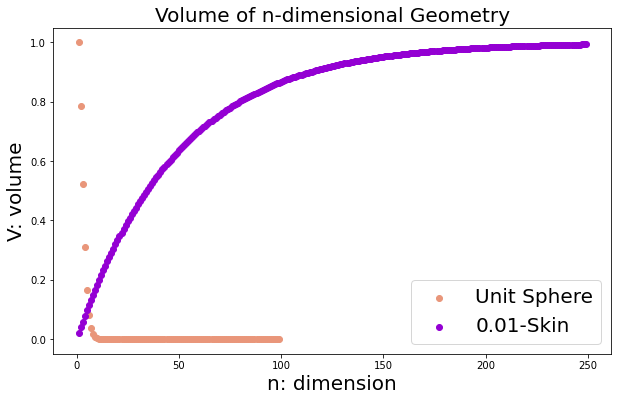

In [19]:
# visualize asymptotic behavior of n-dimensional volumes

plt.figure(figsize=(10,6))

plt.scatter([n for n in range(1,100)], [B(n,0.5) for n in range(1,100)], color="darksalmon", label="Unit Sphere")
plt.scatter([n for n in range(1,250)], [VolumeS(n,0.01) for n in range(1,250)], color="darkviolet", label="0.01-Skin")
plt.xlabel("n: dimension", fontsize=20)
plt.ylabel("V: volume", fontsize=20)
plt.title("Volume of n-dimensional Geometry", fontsize=20)
plt.legend(loc="best", fontsize=20)

plt.show()

It is counter-intuitive that $\mathcal{V}(\mathbf{B}_n)$ converges to $0$ very fast, and the volume of the $\alpha$-skin slowly converges to $1$. But there are intuitive explanations: **(i)** As $n \rightarrow \infty$, any n-dimensional cube with side length smaller than $1$ becomes almost nothing, and any with side length greater than $1$ grow enormously huge. The unit cube $[0,1]^n$ is the only cube that neither shrinks nor explodes as $n \rightarrow \infty$. **(ii)** If we were to make a unit sphere out of a unit cube, we need to get rid of the corners. The higher the dimension, the larger number of corners, and the more material to get rid of. Given that the volume of a unit cube is always $1$, it is not a surprise that $\mathcal{V}(\mathbf{B}_n)$ keeps decreasing as $n$ goes up.

## n-dimensional distances

Randomly sample $1000$ points from $[0,1]^n$ and examine the empirical distribution of the distance between a pair of them. The larger the $n$, to more extent the histogram resembles the bell shape. While the standard deviation does not fluctuates much as $n$ goes from $2$ to $2^{10}$, a parabola seems to capture the trend of the average distance very well.

In [25]:
# compute and collect the distance between every pair of points in n-dimensional unit cube
def sample_dist(dimension, sample_size=1000):
    sample = np.random.random((sample_size, dimension))
    res = list()
    for i,a in enumerate(sample):
        res.extend([np.linalg.norm(a-b) for b in sample[i+1:]])
    return res

In [26]:
Dimension = [2**i for i in range(1,10+1)]
Distance = dict()
avg_dist = list()

# sample from distribution of distances
for n in Dimension:
    Distance[n] = sample_dist(n)

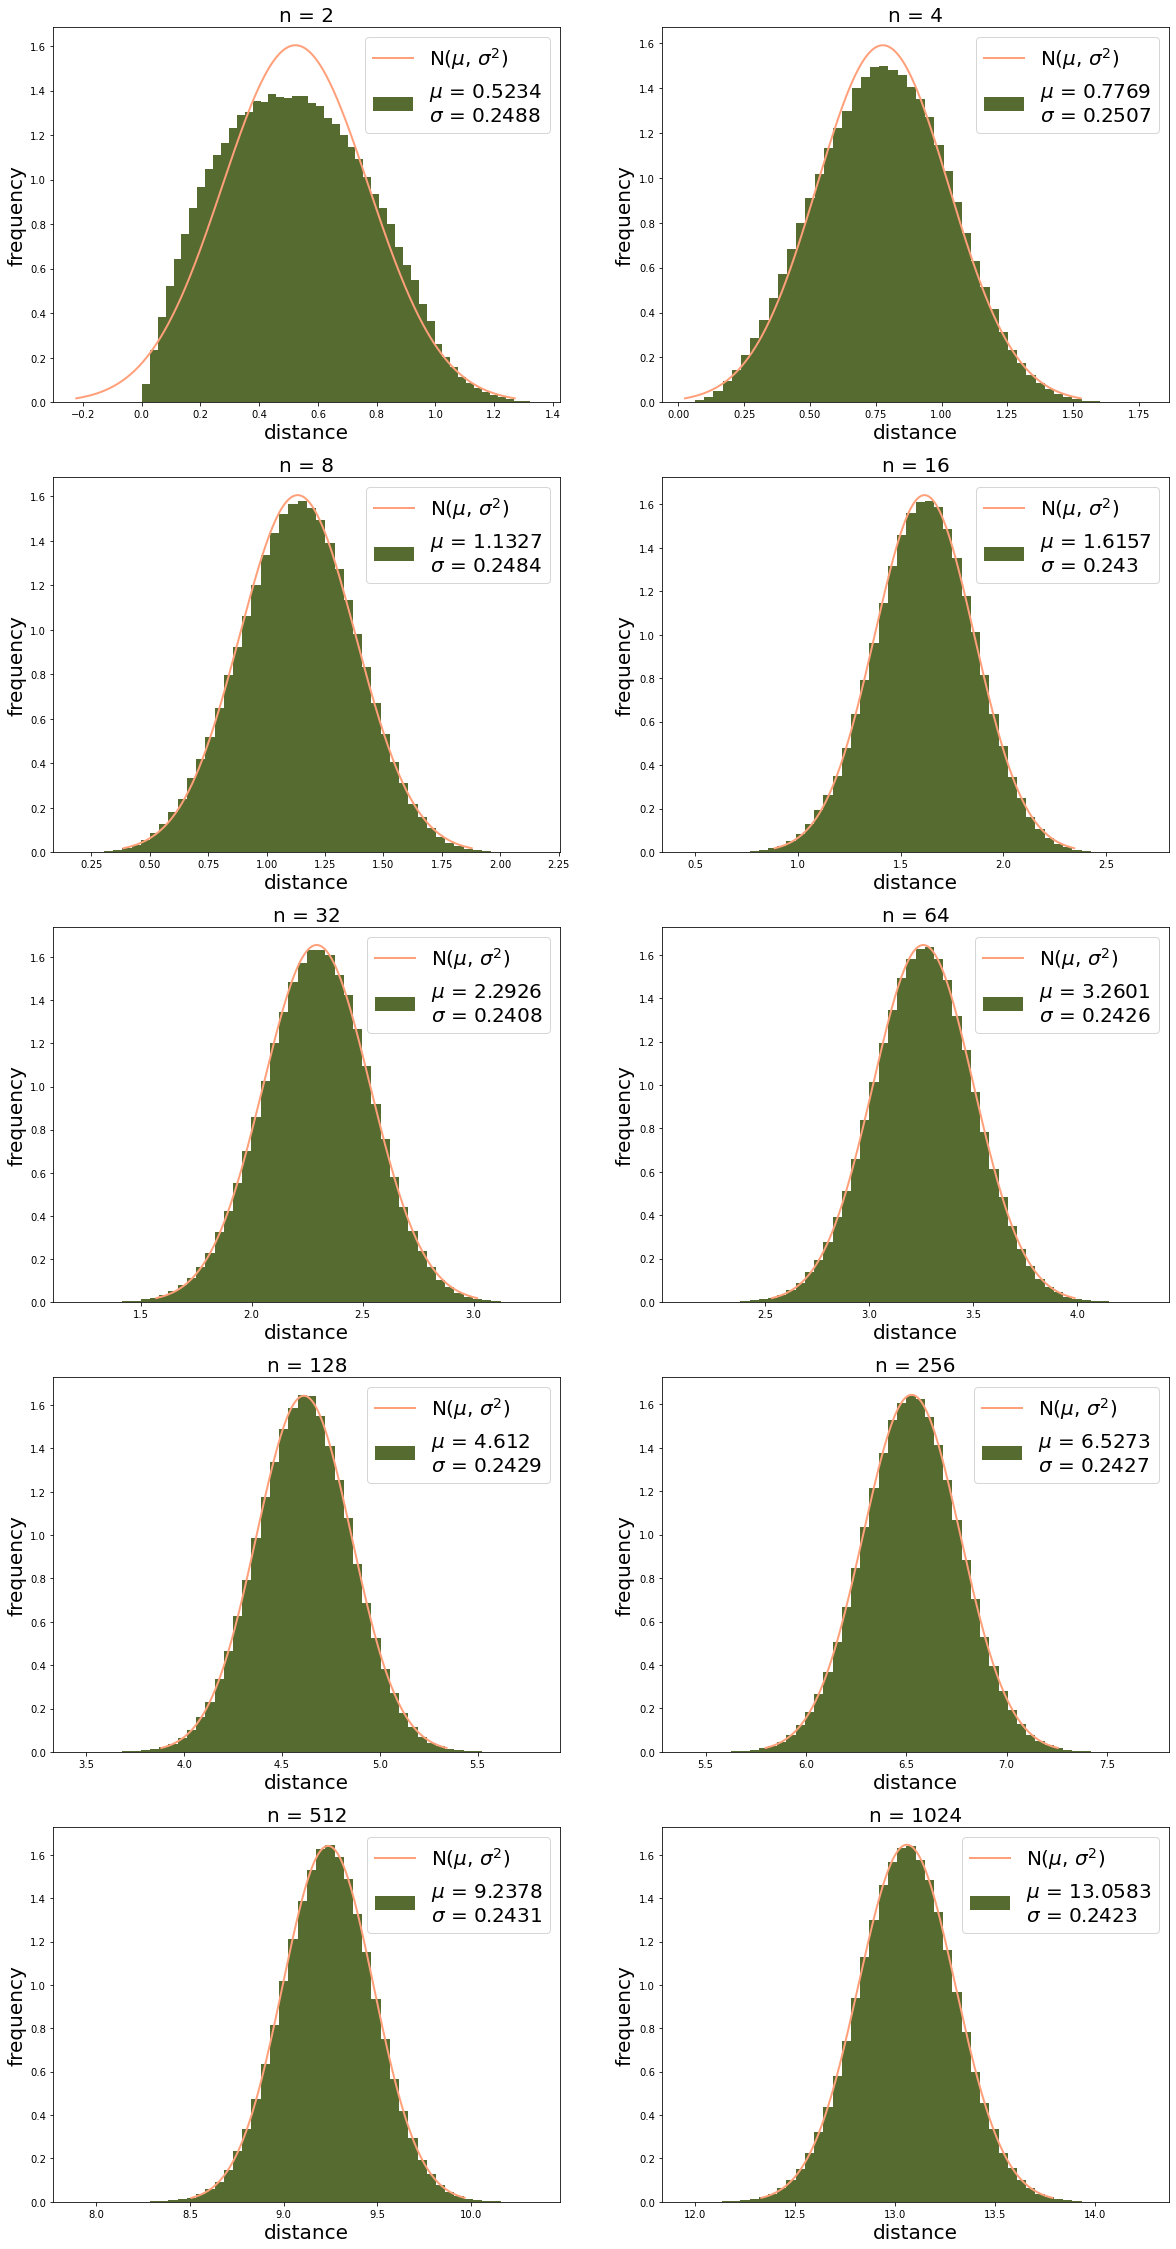

In [27]:
# visualize the empirical distribution 

grizzly,panda = plt.subplots(5,2, figsize=(20,40))

for id,n in enumerate(Dimension):
    i = int(id/2) 
    j = id - 2*i
    mu,sig = np.mean(Distance[n]), np.std(Distance[n])
    avg_dist.append(mu)
    # histogram of frequencies of distance
    panda[i,j].hist(Distance[n], bins=50, density=True, 
                    color="darkolivegreen", 
                    label=r"$\mu$ = "+str(round(mu,4))+"\n"+r"$\sigma$ = "+str(round(sig,4)))
    # fitted normal distribution
    panda[i,j].plot(np.linspace(mu-3*sig,mu+3*sig,500), 
                    sps.norm.pdf(np.linspace(mu-3*sig,mu+3*sig,500),mu,sig),
                    color="lightsalmon", 
                    linewidth=2, 
                    label=r"N($\mu$, $\sigma^2$)")
    panda[i,j].set_title("n = "+str(n), fontsize=20)
    panda[i,j].set_xlabel("distance", fontsize=20)
    panda[i,j].set_ylabel("frequency", fontsize=20)
    panda[i,j].legend(loc="upper right", fontsize=20)
    
plt.show()

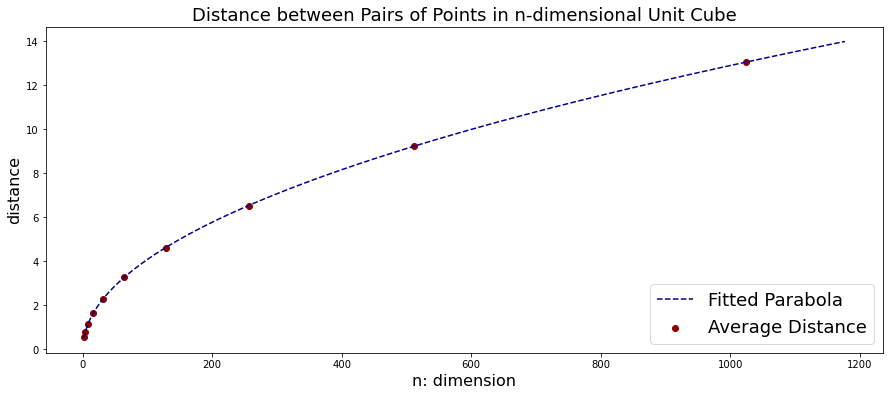

In [28]:
# visualize the average distance for every n

plt.figure(figsize=(15,6))

plt.scatter([n for n in Dimension], avg_dist, color="darkred", label="Average Distance")
# fit a parabola to data points
plt.plot(np.polyval(np.polyfit(avg_dist, Dimension, 2), np.linspace(0.5,14,100)), np.linspace(0.5,14,100),
        color="darkblue", linestyle="dashed", label="Fitted Parabola")
plt.xlabel("n: dimension", fontsize=16)
plt.ylabel("distance", fontsize=16)
plt.title("Distance between Pairs of Points in n-dimensional Unit Cube", fontsize=18)
plt.legend(loc="lower right", fontsize=18)

plt.show()

The average distance $\bar{D}(n)$ is an unbiased estimator for $\mathbb{E}[D(\mathbf{x},\mathbf{z}) | \mathbf{x},\mathbf{z} \in [0,1]^n]$, the expected distance between a pair of points in $[0,1]^n$. Fit the data points $\{(\bar{D}(n_j), n_j)\}_{j=1}^{j=10}$ with a polynomial of degree $2$. The result generalizes nicely to $n=2000$, a new sample far away from the training set.

$$
n_j = \beta_0 + \beta_1 \cdot \bar{D}(n_j) + \beta_2 \cdot \bar{D}^2(n_j);
\;
j = 1, ... , 10
$$

It is interesting that $\mathbb{E}[D(\mathbf{x},\mathbf{z}) | \mathbf{x},\mathbf{z} \in [0,1]^n] \sim \mathbf{\Theta}(\sqrt{n})$.

In [29]:
# print out fitted coefficients
coef = np.polyfit(avg_dist, Dimension, 2)
print("beta = ", coef, "\n")

# predict average distance for n = 2000
D_bar = np.mean(sample_dist(2000, sample_size=3000))
print("n = 2000, average distance = ", D_bar, "\n")

# how well the parabola fits empirical result
print(np.dot(np.array([D_bar**2, D_bar, 1]), coef), "is close enough to n = 2000.")

beta =  [ 6.00911724 -0.09783182  0.47839192] 

n = 2000, average distance =  18.2555789908015 

2001.3278683804506 is close enough to n = 2000.
